In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime


Гудманов Елизар

In [3]:
# задание 1 балл (сум 1)
# загрузить данные, индекс - переменная вида дата/время
#crime = pd.read_csv('crime.csv.zip', parse_dates = ['Unnamed: 0'], index_col='Unnamed: 0').sort_index()
#crime.head()

FileNotFoundError: [Errno 2] No such file or directory: 'crime.csv.zip'

In [46]:
# задание 1 балл (сум 2)
# построить сводную таблицу по клоличеству 
# правонарушений (строки - пол (driver_gender), колонки - расса (driver_race))
gender_race = crime.pivot_table(index="driver_gender", columns = 'driver_race', aggfunc="count", values='violation')
gender_race

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,1022,1339,579,75,96096
M,2424,4232,1983,188,165243


In [79]:
# задание 1 балл (сум 3)
# построить сводную таблицу по процентам в зависимости от рассы (1 - для каждой рассы)
# и пола внутри рассы (например, белые мужчины 0.8, белые женщины 0.2)
# в таблице строки - пол, колонки - расса
abc = pd.crosstab(index= crime.driver_gender, columns= crime.driver_race, values= crime.violation, aggfunc = np.count_nonzero, normalize= 'columns')
abc

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,0.296576,0.240352,0.225995,0.285171,0.367706
M,0.703424,0.759648,0.774005,0.714829,0.632294


<AxesSubplot:xlabel='driver_race'>

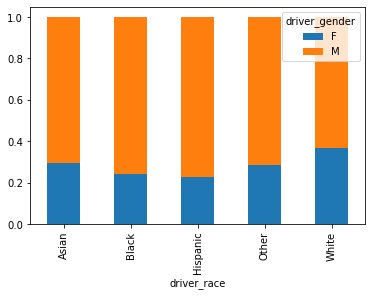

In [103]:
# задание 1 балл (сум 4)
# результат предидущей таблицы визуализировать на столбцовом графике с высотой столбца 1 для каждой рассы и 
# разделением внутри по полу (внимание! подписи на графике)
# seaborn так делать не умеет
abc.transpose().plot(kind ='bar', stacked=True)

In [74]:
# задание 1 балла (сум 5)
# какое кодичество правонарушений  по видам нарушений (violation) 
# зафиксированны для мужчин и женщин (driver_gender)
# обязательно посчитать суммы по строкам/столбцам
# в таблице не должны быть np.nan (только числа)
# все оформить в виде одной сводной таблицы
pol = crime.pivot_table(index="violation", columns = 'driver_gender', aggfunc="count", values='violation_raw')
pol['Total'] = pol.sum(axis=1)
pol.loc['Total']= pol.sum()
pol

driver_gender,F,M,Total
violation,,,
DUI,198.0,513.0,711.0
Equipment,18755.0,31845.0,50600.0
Moving violation,76717.0,135383.0,212100.0
Other,3441.0,6327.0,9768.0
Other (non-mapped),NaN,2.0,2.0
Total,99111.0,174070.0,273181.0


In [110]:
# задание 1 балл (сум 6)
# зависит ли количество правонарушений в среднем от дня недели (рабочий Пн-Пт или выходной Сб-Вс)
# визуализировать результат
# когда больше всего нарушений?


AttributeError: 'Index' object has no attribute 'weekday_name'

## Неадекватный  водитель (Driving under the influence (DUI))
отсюда и ниже работам только с водителями под воздействием веществ (4 балла)

1. Отобрать водителей DUI
2. Проанализировать количество нарушений в среднем в зависимости от дня недели (визуализировать)
3. Разделить выборку на части исходя из среднего количества нарушений (пояснить выбор).
4. Для выделенных частей проанализировать среднее количество правонарушений по часам суток, есль ли разница (если есть то в чем). 

Внимание! На каждой оси X должны стоять не абстрактные числа, а например часы или дни недели.